In [2]:
##LOAD PACKAGES

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
#Mount Google Drive, This could not be run in UC Boulder's Jupyter Notebook because of tensorflow pPackages
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## LOAD DATABASE AND SHOW COLUMNS FOR COLUMNS SELECTION
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/listings_proc2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      3560 non-null   int64  
 1   host_yrs_exp                 3560 non-null   int64  
 2   host_is_superhost.f          3560 non-null   int64  
 3   host_is_superhost.t          3560 non-null   int64  
 4   neighbourhood                2720 non-null   object 
 5   neighbourhood_cleansed       3560 non-null   object 
 6   latitude                     3560 non-null   float64
 7   longitude                    3560 non-null   float64
 8   property_type                3560 non-null   object 
 9   room_entire                  3560 non-null   int64  
 10  room_hotel                   3560 non-null   int64  
 11  room_private                 3560 non-null   int64  
 12  room_shared                  3560 non-null   int64  
 13  accommodates      

In [5]:
## SHOW CORRELATION WITH PRICE
corr = df.corr()
corr["log_price"].sort_values(ascending=False).head(10)

log_price           1.000000
price               0.763818
accommodates        0.628797
bedrooms            0.600038
beds                0.483131
n_bathrooms         0.468728
room_entire         0.416783
entire_prop         0.347475
bathroom_private    0.337145
availability_30     0.168142
Name: log_price, dtype: float64

In [6]:
df.columns

Index(['host_id', 'host_yrs_exp', 'host_is_superhost.f', 'host_is_superhost.t',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_entire', 'room_hotel', 'room_private',
       'room_shared', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'n_bathrooms', 'bathro

In [7]:
## DROP UNWANTED COLUNS, THE VARIABLE TO KEEP HAVE TO BE PRESENT IN LIST "variable_keep"

variables = ['host_id', 'host_yrs_exp', 'host_is_superhost.f', 'host_is_superhost.t',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_entire', 'room_hotel', 'room_private',
       'room_shared', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'n_bathrooms', 'bathroom_private', 'bathroom_shared', 'log_price',
       'amenity_qty', 'fNBHD', 'entire_prop', 'has_wifi', 'has_parking',
       'has_heating', 'has_ac', 'has_tv', 'has_fridge']
variable_keep = [ 'accommodates', 'bedrooms',
       'n_bathrooms', 'bathroom_private','room_private' ,  'log_price', 'neighbourhood_cleansed',
         'has_parking',
       'has_heating', 'has_ac', 'has_tv',  'host_yrs_exp', 'number_of_reviews', "room_entire", "room_hotel"]
for i in variable_keep:
    print(str(i))
    variables.remove(i)

df = df.drop(variables, axis=1)

accommodates
bedrooms
n_bathrooms
bathroom_private
room_private
log_price
neighbourhood_cleansed
has_parking
has_heating
has_ac
has_tv
host_yrs_exp
number_of_reviews
room_entire
room_hotel


In [8]:
#Check if more preprocessing is needed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_yrs_exp            3560 non-null   int64  
 1   neighbourhood_cleansed  3560 non-null   object 
 2   room_entire             3560 non-null   int64  
 3   room_hotel              3560 non-null   int64  
 4   room_private            3560 non-null   int64  
 5   accommodates            3560 non-null   int64  
 6   bedrooms                3560 non-null   int64  
 7   number_of_reviews       3560 non-null   int64  
 8   n_bathrooms             3560 non-null   float64
 9   bathroom_private        3560 non-null   int64  
 10  log_price               3560 non-null   float64
 11  has_parking             3560 non-null   int64  
 12  has_heating             3560 non-null   int64  
 13  has_ac                  3560 non-null   int64  
 14  has_tv                  3560 non-null   

In [9]:
print('UNIQUE VALUES\n')
for col in df.columns:
    print(f'{col}: {len(df[col].unique())}\n')

UNIQUE VALUES

host_yrs_exp: 14

neighbourhood_cleansed: 77

room_entire: 2

room_hotel: 2

room_private: 2

accommodates: 16

bedrooms: 10

number_of_reviews: 361

n_bathrooms: 14

bathroom_private: 2

log_price: 503

has_parking: 2

has_heating: 2

has_ac: 2

has_tv: 2



In [10]:
#Converting categorical data to numerical
df = pd.get_dummies(df)
df.head()

,host_yrs_exp,room_entire,room_hotel,room_private,accommodates,bedrooms,number_of_reviews,n_bathrooms,bathroom_private,log_price,has_parking,has_heating,has_ac,has_tv,neighbourhood_cleansed_Athmar Park,neighbourhood_cleansed_Auraria,neighbourhood_cleansed_Baker,neighbourhood_cleansed_Barnum,neighbourhood_cleansed_Barnum West,neighbourhood_cleansed_Bear Valley,neighbourhood_cleansed_Belcaro,neighbourhood_cleansed_Berkeley,neighbourhood_cleansed_CBD,neighbourhood_cleansed_Capitol Hill,neighbourhood_cleansed_Chaffee Park,neighbourhood_cleansed_Cheesman Park,neighbourhood_cleansed_Cherry Creek,neighbourhood_cleansed_City Park,neighbourhood_cleansed_City Park West,neighbourhood_cleansed_Civic Center,neighbourhood_cleansed_Clayton,neighbourhood_cleansed_Cole,neighbourhood_cleansed_College View - South Platte,neighbourhood_cleansed_Congress Park,neighbourhood_cleansed_Cory - Merrill,neighbourhood_cleansed_Country Club,neighbourhood_cleansed_DIA,neighbourhood_cleansed_East Colfax,neighbourhood_cleansed_Elyria Swansea,neighbourhood_cleansed_Five Points,...,neighbourhood_cleansed_Indian Creek,neighbourhood_cleansed_Jefferson Park,neighbourhood_cleansed_Kennedy,neighbourhood_cleansed_Lincoln Park,neighbourhood_cleansed_Lowry Field,neighbourhood_cleansed_Mar Lee,neighbourhood_cleansed_Marston,neighbourhood_cleansed_Montbello,neighbourhood_cleansed_Montclair,neighbourhood_cleansed_North Capitol Hill,neighbourhood_cleansed_North Park Hill,neighbourhood_cleansed_Northeast Park Hill,neighbourhood_cleansed_Overland,neighbourhood_cleansed_Platt Park,neighbourhood_cleansed_Regis,neighbourhood_cleansed_Rosedale,neighbourhood_cleansed_Ruby Hill,neighbourhood_cleansed_Skyland,neighbourhood_cleansed_Sloan Lake,neighbourhood_cleansed_South Park Hill,neighbourhood_cleansed_Southmoor Park,neighbourhood_cleansed_Speer,neighbourhood_cleansed_Stapleton,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Union Station,neighbourhood_cleansed_University,neighbourhood_cleansed_University Hills,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Valverde,neighbourhood_cleansed_Villa Park,neighbourhood_cleansed_Virginia Village,neighbourhood_cleansed_Washington Park,neighbourhood_cleansed_Washington Park West,neighbourhood_cleansed_Washington Virginia Vale,neighbourhood_cleansed_Wellshire,neighbourhood_cleansed_West Colfax,neighbourhood_cleansed_West Highland,neighbourhood_cleansed_Westwood,neighbourhood_cleansed_Whittier,neighbourhood_cleansed_Windsor
0,13,1,0,0,2,1,85,1.0,1,4.595120,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,13,1,0,0,3,2,159,1.0,1,4.905275,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13,1,0,0,3,1,87,1.5,1,5.187386,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13,0,0,1,3,1,624,1.0,0,4.007333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13,0,0,1,2,1,156,1.0,0,3.951244,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
##This is the beggining of the Random Forest Model: here we are cheking the optimal number of estimators

## MODEL RUN AND EVALUATE USING: default=”squared_error”
## INFO ABOUT MODEL : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
## SPLIT 80 - 20
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train, test = train_test_split(df, test_size=0.2, random_state = 1)
y_train = train["log_price"]
y_test = test["log_price"]
x_train = train.drop("log_price", axis = 1)
x_test = test.drop("log_price", axis = 1)

#Printing thier shapes
print(x_train.shape, y_test.shape)
print(y_train.shape, y_test.shape)

#x_train, x_test, y_train, y_test = train_test_split(train, y_train, test_size=0.2, random_state=42)
estimator = [5, 10, 20, 30, 40, 50, 70, 90, 100, 150, 200, 250, 300, 400, 500, 600, 800, 1000]
results = []
name = []
for i in estimator:
  name.append("cfl" + str(i))
  print(name)

(2848, 90) (712,)
(2848,) (712,)
['cfl5']
['cfl5', 'cfl10']
['cfl5', 'cfl10', 'cfl20']
['cfl5', 'cfl10', 'cfl20', 'cfl30']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200', 'cfl250']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200', 'cfl250', 'cfl300']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200', 'cfl250', 'cfl300', 'cfl400']
[

In [12]:
j = 0
for i in estimator:
  print(name[j])
  name[j] = RandomForestRegressor(n_estimators=i, verbose = 0)
  name[j].fit(x_train, y_train)
  result = mean_squared_error(name[j].predict(x_test),y_test)
  results.append(result)
  print(mean_squared_error(name[j].predict(x_test),y_test))
  j = j + 1

##Different Metrics https://scikit-learn.org/stable/modules/model_evaluation.html



cfl5
0.22210651228231426
cfl10
0.20182900818905955
cfl20
0.18261019469038306
cfl30
0.1863583768870845
cfl40
0.18842141051546005
cfl50
0.18304105228011938
cfl70
0.18288336534263314
cfl90
0.18350475737394253
cfl100
0.18310970444005026
cfl150
0.1822926045525178
cfl200
0.18270481799869415
cfl250
0.18271161381165713
cfl300
0.1839865953108054
cfl400
0.1831712016734325
cfl500
0.18166967928632563
cfl600
0.18169631952809556
cfl800
0.1823719450133965
cfl1000
0.1819361426220387


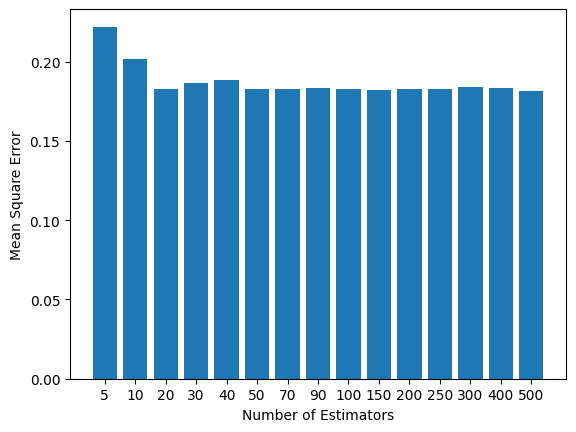

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = estimator[0:15]
y_pos = np.arange(len(objects))
performance = results[0:15]

plt.bar(y_pos, performance, align='center', alpha=1, width = 0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Estimators')


plt.show()

In [15]:
## Here we are cheking the results of Random Forest with a number of estimators equal to 100
##Different Metrics https://scikit-learn.org/stable/modules/model_evaluation.html

print("Mean Squared Error:")
print(mean_squared_error(name[8].predict(x_test),y_test))
print("R2 Score")
print(r2_score(name[8].predict(x_test),y_test))
#print(coeff_determination(name[8].predict(x_test),y_test))

Mean Squared Error:
0.18310970444005026
R2 Score
0.3597047545581966


In [16]:
# This is the Linear Regression Model
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [17]:
y_prediction =  LR.predict(x_test)
score=r2_score(y_test,y_prediction)
print(score)
print(mean_squared_error(y_test,y_prediction))

0.5482803589049603
0.20221494248914512


In [18]:
x_test

,host_yrs_exp,room_entire,room_hotel,room_private,accommodates,bedrooms,number_of_reviews,n_bathrooms,bathroom_private,has_parking,has_heating,has_ac,has_tv,neighbourhood_cleansed_Athmar Park,neighbourhood_cleansed_Auraria,neighbourhood_cleansed_Baker,neighbourhood_cleansed_Barnum,neighbourhood_cleansed_Barnum West,neighbourhood_cleansed_Bear Valley,neighbourhood_cleansed_Belcaro,neighbourhood_cleansed_Berkeley,neighbourhood_cleansed_CBD,neighbourhood_cleansed_Capitol Hill,neighbourhood_cleansed_Chaffee Park,neighbourhood_cleansed_Cheesman Park,neighbourhood_cleansed_Cherry Creek,neighbourhood_cleansed_City Park,neighbourhood_cleansed_City Park West,neighbourhood_cleansed_Civic Center,neighbourhood_cleansed_Clayton,neighbourhood_cleansed_Cole,neighbourhood_cleansed_College View - South Platte,neighbourhood_cleansed_Congress Park,neighbourhood_cleansed_Cory - Merrill,neighbourhood_cleansed_Country Club,neighbourhood_cleansed_DIA,neighbourhood_cleansed_East Colfax,neighbourhood_cleansed_Elyria Swansea,neighbourhood_cleansed_Five Points,neighbourhood_cleansed_Fort Logan,...,neighbourhood_cleansed_Indian Creek,neighbourhood_cleansed_Jefferson Park,neighbourhood_cleansed_Kennedy,neighbourhood_cleansed_Lincoln Park,neighbourhood_cleansed_Lowry Field,neighbourhood_cleansed_Mar Lee,neighbourhood_cleansed_Marston,neighbourhood_cleansed_Montbello,neighbourhood_cleansed_Montclair,neighbourhood_cleansed_North Capitol Hill,neighbourhood_cleansed_North Park Hill,neighbourhood_cleansed_Northeast Park Hill,neighbourhood_cleansed_Overland,neighbourhood_cleansed_Platt Park,neighbourhood_cleansed_Regis,neighbourhood_cleansed_Rosedale,neighbourhood_cleansed_Ruby Hill,neighbourhood_cleansed_Skyland,neighbourhood_cleansed_Sloan Lake,neighbourhood_cleansed_South Park Hill,neighbourhood_cleansed_Southmoor Park,neighbourhood_cleansed_Speer,neighbourhood_cleansed_Stapleton,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Union Station,neighbourhood_cleansed_University,neighbourhood_cleansed_University Hills,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Valverde,neighbourhood_cleansed_Villa Park,neighbourhood_cleansed_Virginia Village,neighbourhood_cleansed_Washington Park,neighbourhood_cleansed_Washington Park West,neighbourhood_cleansed_Washington Virginia Vale,neighbourhood_cleansed_Wellshire,neighbourhood_cleansed_West Colfax,neighbourhood_cleansed_West Highland,neighbourhood_cleansed_Westwood,neighbourhood_cleansed_Whittier,neighbourhood_cleansed_Windsor
93,8,0,0,1,1,1,60,1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3247,2,1,0,0,2,1,0,1.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1827,7,1,0,0,4,1,1,1.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
495,9,1,0,0,2,1,5,1.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1028,8,1,0,0,10,4,52,3.5,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,4,1,0,0,4,1,196,1.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2558,1,1,0,0,6,2,41,1.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# Last are the different Neural Network Models

#imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from scipy import ndimage, misc
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose, Conv1D, SeparableConv2D, DepthwiseConv2D
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pickle
import time
from keras.callbacks import TensorBoard
import keras.backend as K
from keras.layers import LeakyReLU
from scipy import stats 

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#model.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])


In [ ]:

nombre_h5 = 'AirSavings.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])


In [ ]:

nombre_h5_dropout = 'AirSavings_dropout.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_dropout, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model2 = Sequential()

model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

In [ ]:

nombre_h5_bn = 'AirSavings_bn.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_bn, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model3 = Sequential()

model3.add(Dense(50, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(100, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(50, activation='relu'))
model3.add(Dense(1))

model3.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

In [ ]:

nombre_h5_bndo = 'AirSavings_bndo.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_bndo, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model4 = Sequential()

model4.add(Dense(50, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(50, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)



Epoch 1/400

Epoch 00001: val_loss improved from inf to 4.38737, saving model to AirSavings_bndo.h5
89/89 - 1s - loss: 4.6255 - coeff_determination: -9.0228e+00 - val_loss: 4.3874 - val_coeff_determination: -9.7199e+00 - 1s/epoch - 12ms/step
Epoch 2/400

Epoch 00002: val_loss improved from 4.38737 to 0.42047, saving model to AirSavings_bndo.h5
89/89 - 0s - loss: 1.0945 - coeff_determination: -1.5024e+00 - val_loss: 0.4205 - val_coeff_determination: -2.2092e-02 - 110ms/epoch - 1ms/step
Epoch 3/400

Epoch 00003: val_loss improved from 0.42047 to 0.38470, saving model to AirSavings_bndo.h5
89/89 - 0s - loss: 0.4790 - coeff_determination: -8.8577e-02 - val_loss: 0.3847 - val_coeff_determination: 0.0348 - 93ms/epoch - 1ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.38470
89/89 - 0s - loss: 0.5211 - coeff_determination: -1.8543e-01 - val_loss: 0.5239 - val_coeff_determination: -3.2006e-01 - 100ms/epoch - 1ms/step
Epoch 5/400

Epoch 00005: val_loss improved from 0.38470 to 

In [ ]:
history2 = model2.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss did not improve from 0.20950
89/89 - 1s - loss: 94.5634 - coeff_determination: -2.2285e+02 - val_loss: 7.8283 - val_coeff_determination: -1.8382e+01 - 630ms/epoch - 7ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 0.20950
89/89 - 0s - loss: 33.1028 - coeff_determination: -7.8510e+01 - val_loss: 6.3057 - val_coeff_determination: -1.4922e+01 - 79ms/epoch - 890us/step
Epoch 3/400

Epoch 00003: val_loss did not improve from 0.20950
89/89 - 0s - loss: 17.8102 - coeff_determination: -3.9700e+01 - val_loss: 6.2674 - val_coeff_determination: -1.5015e+01 - 78ms/epoch - 880us/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.20950
89/89 - 0s - loss: 13.8285 - coeff_determination: -3.2240e+01 - val_loss: 6.1818 - val_coeff_determination: -1.4880e+01 - 89ms/epoch - 996us/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 0.20950
89/89 - 0s - loss: 9.6235 - coeff_determination: -2.0876e+01 - val_loss: 6.9041 - val_coeff_deter

In [ ]:
history3 = model3.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss did not improve from 0.20950
89/89 - 1s - loss: 2.3866 - coeff_determination: -4.2581e+00 - val_loss: 9.3589 - val_coeff_determination: -2.2340e+01 - 1s/epoch - 14ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 0.20950
89/89 - 0s - loss: 0.5161 - coeff_determination: -1.4871e-01 - val_loss: 3.8700 - val_coeff_determination: -8.6810e+00 - 105ms/epoch - 1ms/step
Epoch 3/400

Epoch 00003: val_loss did not improve from 0.20950
89/89 - 0s - loss: 0.4261 - coeff_determination: 0.0462 - val_loss: 0.9669 - val_coeff_determination: -1.3927e+00 - 105ms/epoch - 1ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.20950
89/89 - 0s - loss: 0.3755 - coeff_determination: 0.1752 - val_loss: 0.4163 - val_coeff_determination: 0.0075 - 103ms/epoch - 1ms/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 0.20950
89/89 - 0s - loss: 0.3421 - coeff_determination: 0.2182 - val_loss: 0.3208 - val_coeff_determination: 0.2501 - 117ms/epoc

In [ ]:
history4 = model4.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss did not improve from 0.20950
89/89 - 1s - loss: 9.4085 - coeff_determination: -2.0662e+01 - val_loss: 7.6902 - val_coeff_determination: -1.8113e+01 - 1s/epoch - 13ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 0.20950
89/89 - 0s - loss: 4.8880 - coeff_determination: -1.0510e+01 - val_loss: 3.1277 - val_coeff_determination: -6.7421e+00 - 113ms/epoch - 1ms/step
Epoch 3/400

Epoch 00003: val_loss did not improve from 0.20950
89/89 - 0s - loss: 3.9544 - coeff_determination: -8.2825e+00 - val_loss: 1.8418 - val_coeff_determination: -3.5531e+00 - 101ms/epoch - 1ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.20950
89/89 - 0s - loss: 3.1323 - coeff_determination: -6.1635e+00 - val_loss: 1.4374 - val_coeff_determination: -2.5171e+00 - 101ms/epoch - 1ms/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 0.20950
89/89 - 0s - loss: 3.0975 - coeff_determination: -6.2934e+00 - val_loss: 1.6175 - val_coeff_determination:

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


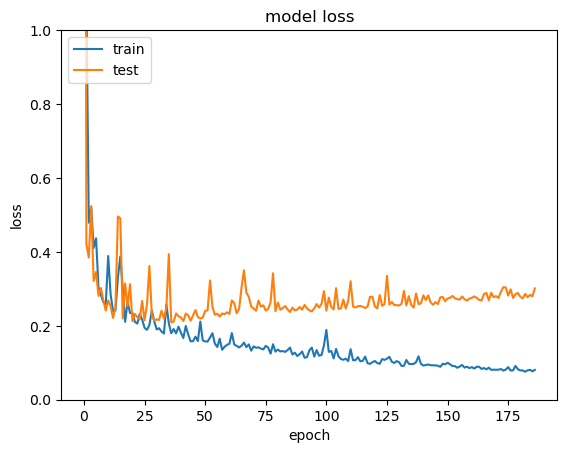

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


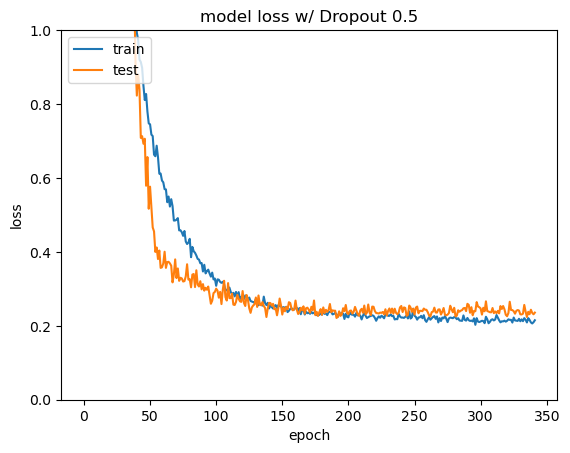

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


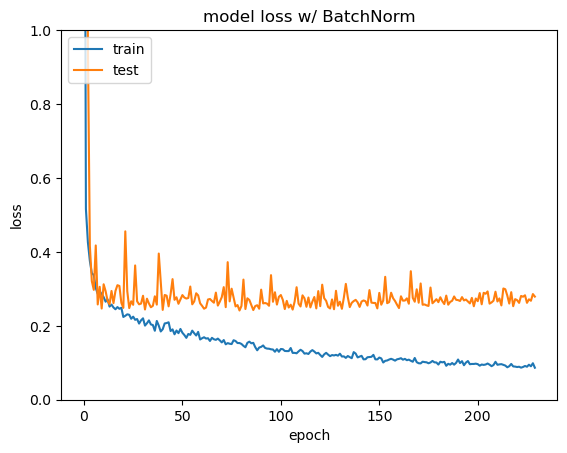

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


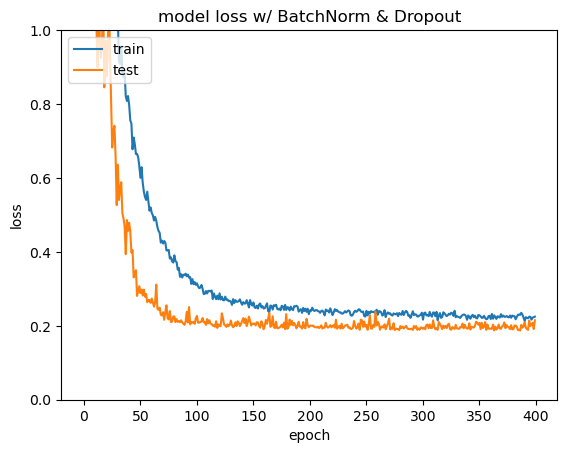

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss w/ Dropout 0.5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss w/ BatchNorm')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss w/ BatchNorm & Dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()




In [ ]:
#Check the minimun MSE of each model
print(min(history.history['val_loss']))
print(min(history2.history['val_loss']))
print(min(history3.history['val_loss']))
print(min(history4.history['val_loss']))

0.20950362086296082
0.22118152678012848
0.24143126606941223
0.1872386932373047


In [ ]:
#Check the maximun R2 of each model
print(max(history.history['val_coeff_determination']))
print(max(history2.history['val_coeff_determination']))
print(max(history3.history['val_coeff_determination']))
print(max(history4.history['val_coeff_determination']))

0.5161040425300598
0.4878338873386383
0.4335084855556488
0.5651978850364685


In [ ]:
# Lets try a model with more neurons to see what happens
nombre_h5 = 'AirSavings.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model = Sequential()

model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])


In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=200,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)



Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.78088, saving model to AirSavings.h5
89/89 - 1s - loss: 3.5632 - coeff_determination: -7.1665e+00 - val_loss: 0.7809 - val_coeff_determination: -9.8721e-01 - 707ms/epoch - 8ms/step
Epoch 2/200

Epoch 00002: val_loss improved from 0.78088 to 0.41393, saving model to AirSavings.h5
89/89 - 0s - loss: 0.5721 - coeff_determination: -2.8477e-01 - val_loss: 0.4139 - val_coeff_determination: -1.4335e-02 - 115ms/epoch - 1ms/step
Epoch 3/200

Epoch 00003: val_loss improved from 0.41393 to 0.34166, saving model to AirSavings.h5
89/89 - 0s - loss: 0.7132 - coeff_determination: -7.8693e-01 - val_loss: 0.3417 - val_coeff_determination: 0.1685 - 115ms/epoch - 1ms/step
Epoch 4/200

Epoch 00004: val_loss improved from 0.34166 to 0.28688, saving model to AirSavings.h5
89/89 - 0s - loss: 0.3552 - coeff_determination: 0.2010 - val_loss: 0.2869 - val_coeff_determination: 0.2950 - 130ms/epoch - 1ms/step
Epoch 5/200

Epoch 00005: val_loss did not impr

In [ ]:
# Lets try a model with more neurons and regularization
nombre_h5_bndo = 'AirSavings_bndo.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_bndo, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model4 = Sequential()

model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])
history4 = model4.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)



Epoch 1/400

Epoch 00001: val_loss improved from inf to 14.06144, saving model to AirSavings_bndo.h5
89/89 - 2s - loss: 23.1864 - coeff_determination: -5.3516e+01 - val_loss: 14.0614 - val_coeff_determination: -3.4025e+01 - 2s/epoch - 21ms/step
Epoch 2/400

Epoch 00002: val_loss improved from 14.06144 to 5.02264, saving model to AirSavings_bndo.h5
89/89 - 0s - loss: 13.0345 - coeff_determination: -2.8889e+01 - val_loss: 5.0226 - val_coeff_determination: -1.1470e+01 - 150ms/epoch - 2ms/step
Epoch 3/400

Epoch 00003: val_loss improved from 5.02264 to 1.87540, saving model to AirSavings_bndo.h5
89/89 - 0s - loss: 6.8952 - coeff_determination: -1.5127e+01 - val_loss: 1.8754 - val_coeff_determination: -3.5991e+00 - 180ms/epoch - 2ms/step
Epoch 4/400

Epoch 00004: val_loss improved from 1.87540 to 0.60642, saving model to AirSavings_bndo.h5
89/89 - 0s - loss: 4.7218 - coeff_determination: -1.0210e+01 - val_loss: 0.6064 - val_coeff_determination: -4.3798e-01 - 175ms/epoch - 2ms/step
Epoch 5/4

0.558376133441925
